# Analyzing Coefficients - V2
- `RENAME: we started to analyze the coefficents in lesson 01-v2. Consider a new name for this like "iterating on our coefficients" or "thoughtful selection of coefficients",etc`

## Lesson Objectives

By the end of this lesson, students will be able to:
- Extract and visualize coefficients in more helpful formats.
- ***Interpret coefficients for raw data vs scaled data.***
- Use coefficient values to inform modeling choices (for insights).
- Encode nominal categories as ordinal (based on the target)
- Determine which version of the coefficients would be best for extracting insights and recommendations for a stakeholder. 


# Our Previous Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Reviewing the options used
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

## Customization Options
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'

## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
import joblib


## Code/Model From Previous Lesson

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Customization Options
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'

## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

SEED = 321
np.random.seed(SEED)

In [3]:
## Load in the King's County housing dataset and display the head and info
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"

df = pd.read_excel(url,sheet_name='student-mat')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.00,U,GT3,A,4.00,4.00,at_home,teacher,course,mother,2.00,2.00,0.00,yes,no,no,no,yes,yes,no,no,4.00,3.00,4.00,1.00,1.00,3.00,6.00,5.00,6.00,6.00
1,GP,F,17.00,U,GT3,T,1.00,1.00,at_home,other,course,father,1.00,2.00,0.00,no,yes,no,no,no,yes,yes,no,5.00,3.00,3.00,1.00,1.00,3.00,4.00,5.00,5.00,6.00
2,GP,F,15.00,U,LE3,T,1.00,1.00,at_home,other,other,mother,1.00,2.00,3.00,yes,no,yes,no,yes,yes,yes,no,4.00,3.00,2.00,2.00,3.00,3.00,10.00,7.00,8.00,10.00
3,GP,F,15.00,U,GT3,T,4.00,2.00,health,services,home,mother,1.00,3.00,0.00,no,yes,yes,yes,yes,yes,yes,yes,3.00,2.00,2.00,1.00,1.00,5.00,2.00,15.00,14.00,15.00
4,GP,F,16.00,U,GT3,T,3.00,3.00,other,other,home,father,1.00,2.00,0.00,no,yes,yes,no,yes,yes,no,no,4.00,3.00,2.00,1.00,2.00,5.00,4.00,6.00,10.00,10.00


In [4]:
# ## Load in the King's County housing dataset and display the head and info
# df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv")

# ## Dropping some features for time
# df = df.drop(columns=['date'])


# ## Make the house ids the index
# df = df.set_index('id')

# ## drop lat/long
# df = df.drop(columns=['lat','long'])
# ## Treating zipcode as a category
# df['zipcode'] = df['zipcode'].astype(str)

# df.info()
# df.head()

In [5]:
# ### Train Test Split
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G3']).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)


# ### Preprocessing + ColumnTransformer

## make categorical & numeric selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))

num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)

## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)


X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
58,15.00,1.00,2.00,1.00,2.00,0.00,4.00,3.00,2.00,1.00,1.00,5.00,2.00,9.00,10.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
338,18.00,3.00,3.00,1.00,4.00,0.00,5.00,3.00,3.00,1.00,1.00,1.00,7.00,16.00,15.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
291,17.00,4.00,3.00,1.00,3.00,0.00,4.00,2.00,2.00,1.00,2.00,3.00,0.00,15.00,15.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00


In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_linreg(model, X_train,y_train, X_test,y_test, return_df=False,
                    get_coeffs=True, coeffs_name = "Coefficients"):

    results = []
    
    y_hat_train = model.predict(X_train)
    r2_train = r2_score(y_train,y_hat_train)
    rmse_train = mean_squared_error(y_train,y_hat_train, squared=False)
    results.append({'Data':'Train', 'R^2':r2_train, "RMSE": rmse_train})
    
    y_hat_test = model.predict(X_test)
    r2_test = r2_score(y_test,y_hat_test)
    rmse_test = mean_squared_error(y_test,y_hat_test, squared=False)
    results.append({'Data':'Test', 'R^2':r2_test, "RMSE": rmse_test})
    
    results_df = pd.DataFrame(results).round(3).set_index('Data')
    results_df.loc['Delta'] = results_df.loc['Test'] - results_df.loc['Train']
    results_df = results_df.T
    

    print(results_df)
        
    if get_coeffs:
        coeffs = pd.Series(model.coef_, index= X_train.columns)
    if model.intercept_!=0:
        coeffs.loc['intercept'] = model.intercept_
    coeffs.name = coeffs_name
    return coeffs

In [7]:
from sklearn.linear_model import LinearRegression

## fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
coeffs_orig = evaluate_linreg(lin_reg, X_train_df, y_train, X_test_df,y_test,
                             coeffs_name='Original')
coeffs_orig

Data  Train  Test  Delta
R^2    0.85  0.81  -0.04
RMSE   1.83  1.85   0.02


age                 -0.22
Medu                 0.29
Fedu                -0.18
traveltime           0.19
studytime           -0.22
failures            -0.10
famrel               0.31
freetime             0.02
goout               -0.02
Dalc                -0.21
Walc                 0.26
health               0.03
absences             0.05
G1                   0.14
G2                   0.99
school_MS            0.38
sex_M               -0.01
address_U            0.15
famsize_LE3          0.01
Pstatus_T            0.38
Mjob_at_home        -0.05
Mjob_health         -0.02
Mjob_other           0.16
Mjob_services        0.12
Mjob_teacher        -0.21
Fjob_at_home         0.33
Fjob_health          0.38
Fjob_other          -0.11
Fjob_services       -0.54
Fjob_teacher        -0.05
reason_course       -0.09
reason_home         -0.42
reason_other         0.30
reason_reputation    0.21
guardian_father     -0.20
guardian_mother      0.07
guardian_other       0.13
schoolsup_yes        0.34
famsup_yes  

# Iterating On Our Model

## Removing the Intercept

> First, we can remove the intercept from our model, which will force the LinearRegression to explain all of the price without being free to calculate whatever intercept would help the model.


In [8]:
## fitting a linear regression model
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_df, y_train)
coeffs_no_int = evaluate_linreg(lin_reg, X_train_df, y_train, X_test_df,y_test,
                               coeffs_name='No Intercept')
coeffs_no_int.sort_values()

Data  Train  Test  Delta
R^2    0.85  0.81  -0.04
RMSE   1.83  1.85   0.02


Fjob_services       -0.73
reason_home         -0.66
guardian_father     -0.52
Mjob_teacher        -0.40
activities_yes      -0.34
reason_course       -0.33
Fjob_other          -0.31
romantic_yes        -0.29
guardian_mother     -0.25
Mjob_at_home        -0.24
Fjob_teacher        -0.24
age                 -0.22
studytime           -0.22
Mjob_health         -0.21
Dalc                -0.21
nursery_yes         -0.21
guardian_other      -0.19
Fedu                -0.18
failures            -0.10
internet_yes        -0.09
Mjob_services       -0.07
Mjob_other          -0.03
reason_reputation   -0.03
goout               -0.02
sex_M               -0.01
famsize_LE3          0.01
freetime             0.02
health               0.03
absences             0.05
reason_other         0.06
Fjob_at_home         0.13
G1                   0.14
address_U            0.15
famsup_yes           0.16
paid_yes             0.16
Fjob_health          0.18
traveltime           0.19
Walc                 0.26
Medu        

### To Intercept or Not To Intercept?

In [9]:
compare = pd.concat([coeffs_orig, coeffs_no_int],axis=1)
compare = compare.sort_values('Original')
compare['Diff'] = compare['No Intercept'] - compare['Original']
compare

,Original,No Intercept,Diff
intercept,-0.95,NaN,NaN
Fjob_services,-0.54,-0.73,-0.19
reason_home,-0.42,-0.66,-0.24
activities_yes,-0.34,-0.34,0.00
romantic_yes,-0.29,-0.29,-0.00
age,-0.22,-0.22,-0.00
studytime,-0.22,-0.22,-0.00
Dalc,-0.21,-0.21,0.00
nursery_yes,-0.21,-0.21,0.00
Mjob_teacher,-0.21,-0.40,-0.19


- At this point, there is a valid argument for using either model as the basis for our stakeholder recommendations. 
- As long as you are comfortable explaining the intercept as the baseline house price (when all Xs are 0), then it is not difficult to express the findings to a stakeholder.
- Let's see if either version looks better when visualzied.


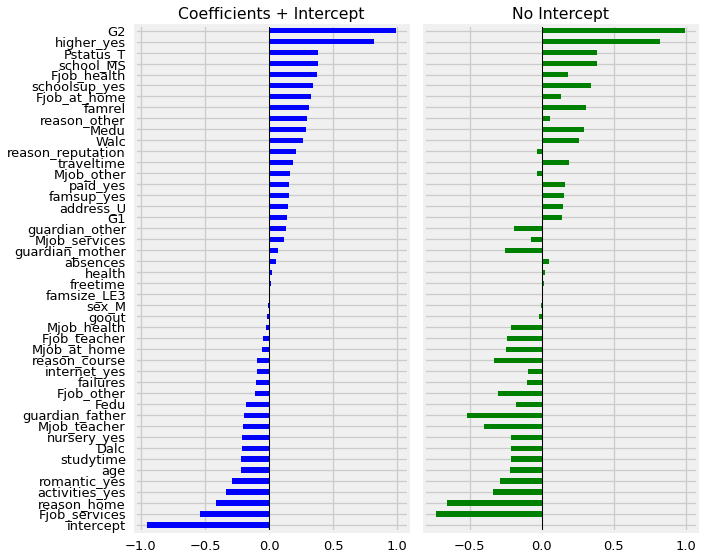

In [10]:
fig, axes = plt.subplots(ncols=2,figsize=(10,8),sharey=True)

compare['Original'].plot(kind='barh',color='blue',ax=axes[0],title='Coefficients + Intercept')
compare['No Intercept'].plot(kind='barh',color='green',ax=axes[1],title='No Intercept')

[ax.axvline(0,color='black',lw=1) for ax in axes]
fig.tight_layout()

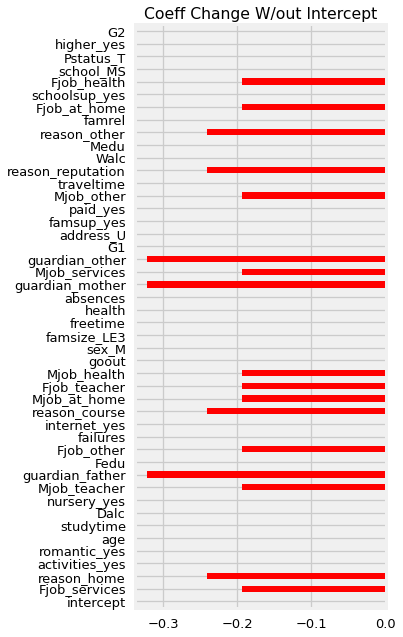

In [11]:
compare['Diff'].plot(kind='barh',figsize=(4,10),color='red',title='Coeff Change W/out Intercept');

- We can see that by removing the intercept from our model, which had a value of -.95, we have changed the value of several, but not all of the other coefficients.
- Notice that, in this case, when our model removed a negative baseline value (the intercept), that many of the other coefficients became had a negative change. While this will not always be the case, it does demonstrate how our model has to change the coefficients values when it no longer can calculate a starting grade before factoring in the features.

## Scaling Our Features

- Since we have entirely numeric features, we can simply scale our already-processed X_train/X_test variables by creating a new scaler. 
    - Note: for more complicated datasets, we would want to create a new precprocessor where we add the scaler to the numeric pipeline.

In [12]:

# ### Preprocessing + ColumnTransformer
num_pipe_scale = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

## make the preprocessing column transformer
preprocessor_scale = make_column_transformer((num_pipe_scale, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)

## fit column transformer and run get_feature_names_out
preprocessor_scale.fit(X_train)
feature_names = preprocessor_scale.get_feature_names_out()

X_train_scaled = pd.DataFrame(preprocessor_scale.transform(X_train), 
                          columns = feature_names, index = X_train.index)


X_test_scaled = pd.DataFrame(preprocessor_scale.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_scaled.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
58,-1.30,-1.61,-0.49,-0.65,-0.01,-0.44,0.07,-0.17,-0.94,-0.52,-0.98,1.03,-0.47,-0.56,-0.17,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
338,1.01,0.22,0.43,-0.65,2.38,-0.44,1.18,-0.17,-0.05,-0.52,-0.98,-1.81,0.17,1.53,1.13,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
291,0.24,1.14,0.43,-0.65,1.18,-0.44,0.07,-1.16,-0.94,-0.52,-0.22,-0.39,-0.72,1.23,1.13,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00


In [13]:
## fitting a linear regression model
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_scaled, y_train)
coeffs_scaled = evaluate_linreg(lin_reg, X_train_scaled, y_train, X_test_scaled,y_test)
coeffs_scaled

Data  Train  Test  Delta
R^2    0.85  0.81  -0.04
RMSE   1.83  1.85   0.02


age                 -0.29
Medu                 0.32
Fedu                -0.19
traveltime           0.14
studytime           -0.18
failures            -0.07
famrel               0.28
freetime             0.02
goout               -0.02
Dalc                -0.19
Walc                 0.34
health               0.04
absences             0.42
G1                   0.47
G2                   3.81
school_MS            0.38
sex_M               -0.01
address_U            0.15
famsize_LE3          0.01
Pstatus_T            0.38
Mjob_at_home         1.88
Mjob_health          1.91
Mjob_other           2.10
Mjob_services        2.05
Mjob_teacher         1.73
Fjob_at_home         2.26
Fjob_health          2.31
Fjob_other           1.82
Fjob_services        1.40
Fjob_teacher         1.89
reason_course        2.33
reason_home          2.00
reason_other         2.72
reason_reputation    2.63
guardian_father      3.03
guardian_mother      3.30
guardian_other       3.36
schoolsup_yes        0.34
famsup_yes  

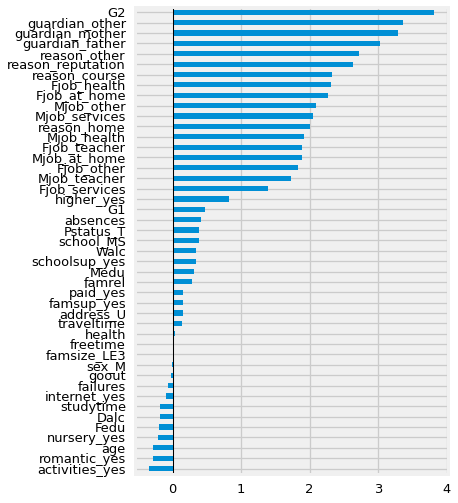

In [14]:
fig, ax = plt.subplots(figsize=(5,8))
coeffs_scaled.sort_values().plot(kind='barh')
# compare['Original'].plot(kind='barh',color='blue',ax=axes[0],title='Coefficients + Intercept')
# compare['No Intercept'].plot(kind='barh',color='green',ax=axes[1],title='No Intercept')

ax.axvline(0,color='black',lw=1)


# 📌 TO DO
- visualize and discuss the scaled coefficients
- select scaled vs not scaled

# Revisiting Our Business Case

- Thus far, we have done all of our modeling under the assumption that we want to predict how well current students will do in their final year.
- However, the stakeholder likely cares more about identifying how students will perform at very beginning of their Year 1. 
    - Let's keep this in mind and remove any features that we would not have known when the student was at the beginning of Year 1.

## Modeling - For New Students

- We **must** remove:
    - G1: We wouldn't know year 1 grades yet.
    - G2: We wouldn't know year 1 grades yet.
    
- We should **probably** remove:
    - paid: We would not know if students paid for extra classes in the subject yet. 
        - Though we may be able to find out if they are WILLING to pay for extra classes.
    - activities: We would not know if the student was involved in extracurriculars at this school yet.
        - Though we may be able to ask students if they INTEND to be involved in activities.
        

- We **may** want to remove:
    - absences:
        - We wouldn't have absences from the current school, though we likely could get absences from their previous school.
    - Dalc: Work day alcohol consumption. Hopefully, the students who have not entered high school yet will not already be consuming alcohol.
    - Walc: weekend alcohol consumption. Hopefully, the students who have not entered high school yet will not already be consuming alcohol.

As you can see, some of the features are obviously inappropriate to include, but many of them are a bit more ambiguous. 
    - Always think of your stakeholder's goals/problem statement when deciding what features to include in your model/analysis. 
>- When in doubt, contact and ask your stakeholder about the choice(s) you are considering!

### `DECIDE IF USING SCALED`

#### Unsaled

In [15]:
## remove cols that MUST be removed.

df_mvp = df.drop(columns=['G1','G2'])

# ### Train Test Split
## Make x and y variables
y = df_mvp['G3'].copy()
X = df_mvp.drop(columns=['G3']).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)



## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)


X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
58,15.00,1.00,2.00,1.00,2.00,0.00,4.00,3.00,2.00,1.00,1.00,5.00,2.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
338,18.00,3.00,3.00,1.00,4.00,0.00,5.00,3.00,3.00,1.00,1.00,1.00,7.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
291,17.00,4.00,3.00,1.00,3.00,0.00,4.00,2.00,2.00,1.00,2.00,3.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00


In [16]:
## fitting a linear regression model
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_df, y_train)
coeffs_mvp = evaluate_linreg(lin_reg, X_train_df, y_train, X_test_df,y_test)
coeffs_mvp

Data  Train  Test  Delta
R^2    0.30  0.04  -0.26
RMSE   3.91  4.12   0.21


age                 -0.34
Medu                 0.58
Fedu                -0.06
traveltime          -0.13
studytime            0.29
failures            -1.79
famrel               0.12
freetime             0.27
goout               -0.70
Dalc                -0.33
Walc                 0.36
health              -0.21
absences             0.05
school_MS            0.61
sex_M                1.00
address_U            0.60
famsize_LE3          0.29
Pstatus_T           -0.12
Mjob_at_home         2.75
Mjob_health          4.74
Mjob_other           2.74
Mjob_services        3.59
Mjob_teacher         1.42
Fjob_at_home         3.21
Fjob_health          3.34
Fjob_other           2.23
Fjob_services        2.39
Fjob_teacher         4.06
reason_course        2.82
reason_home          3.60
reason_other         4.56
reason_reputation    4.26
guardian_father      4.43
guardian_mother      4.88
guardian_other       5.93
schoolsup_yes       -1.08
famsup_yes          -1.07
paid_yes             0.41
activities_y

- As we can see above, NOT including the grade from year 2 dramatically hurts our model's ability to predict the final grade. 

#### Scaled

In [17]:
## fit column transformer and run get_feature_names_out
preprocessor_scale.fit(X_train)
feature_names = preprocessor_scale.get_feature_names_out()

X_train_scaled = pd.DataFrame(preprocessor_scale.transform(X_train), 
                          columns = feature_names, index = X_train.index)


X_test_scaled = pd.DataFrame(preprocessor_scale.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
58,15.00,1.00,2.00,1.00,2.00,0.00,4.00,3.00,2.00,1.00,1.00,5.00,2.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
338,18.00,3.00,3.00,1.00,4.00,0.00,5.00,3.00,3.00,1.00,1.00,1.00,7.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
291,17.00,4.00,3.00,1.00,3.00,0.00,4.00,2.00,2.00,1.00,2.00,3.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00


In [18]:
## fitting a linear regression model
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_scaled, y_train)
coeffs_mvp_scaled = evaluate_linreg(lin_reg, X_train_scaled, y_train,
                                    X_test_scaled,y_test, 
                                    coeffs_name="Scaled Coefficients")
coeffs_mvp_scaled

Data  Train  Test  Delta
R^2    0.30  0.04  -0.26
RMSE   3.91  4.12   0.21


age                 -0.44
Medu                 0.63
Fedu                -0.06
traveltime          -0.09
studytime            0.24
failures            -1.29
famrel               0.11
freetime             0.27
goout               -0.78
Dalc                -0.29
Walc                 0.47
health              -0.30
absences             0.38
school_MS            0.61
sex_M                1.00
address_U            0.60
famsize_LE3          0.29
Pstatus_T           -0.12
Mjob_at_home         1.65
Mjob_health          3.64
Mjob_other           1.64
Mjob_services        2.49
Mjob_teacher         0.33
Fjob_at_home         2.12
Fjob_health          2.24
Fjob_other           1.13
Fjob_services        1.30
Fjob_teacher         2.97
reason_course        1.45
reason_home          2.22
reason_other         3.19
reason_reputation    2.89
guardian_father      2.61
guardian_mother      3.05
guardian_other       4.10
schoolsup_yes       -1.08
famsup_yes          -1.07
paid_yes             0.41
activities_y

### Final Comparison

In [19]:
compare = pd.concat([coeffs_mvp, coeffs_mvp_scaled],axis=1)
compare

,Coefficients,Scaled Coefficients
age,-0.34,-0.44
Medu,0.58,0.63
Fedu,-0.06,-0.06
traveltime,-0.13,-0.09
studytime,0.29,0.24
failures,-1.79,-1.29
famrel,0.12,0.11
freetime,0.27,0.27
goout,-0.70,-0.78
Dalc,-0.33,-0.29


In [20]:
compare = compare.sort_values('Coefficients')
compare['Diff'] = compare['Scaled Coefficients'] - compare['Coefficients']
compare

,Coefficients,Scaled Coefficients,Diff
failures,-1.79,-1.29,0.50
romantic_yes,-1.39,-1.39,-0.00
schoolsup_yes,-1.08,-1.08,0.00
famsup_yes,-1.07,-1.07,-0.00
goout,-0.70,-0.78,-0.09
age,-0.34,-0.44,-0.10
Dalc,-0.33,-0.29,0.04
health,-0.21,-0.30,-0.09
nursery_yes,-0.13,-0.13,-0.00
traveltime,-0.13,-0.09,0.03


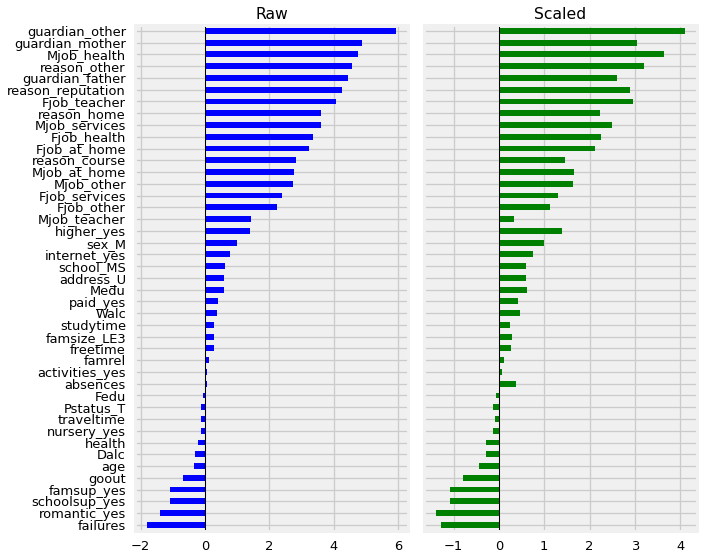

In [21]:
fig, axes = plt.subplots(ncols=2,figsize=(10,8),sharey=True)

compare['Coefficients'].plot(kind='barh',color='blue',ax=axes[0],title="Raw")
compare['Scaled Coefficients'].plot(kind='barh',color='green',ax=axes[1],title='Scaled')

[ax.axvline(0,color='black',lw=1) for ax in axes]
fig.tight_layout()

In [22]:

# ax = coeffs_mvp.sort_values().plot(kind='barh',figsize=(6,10))
# ax.axvline(0,color='k')
# ax.set_title('LinearRegression Coefficients');

- Notice how VERY diferent our coefficients are now that we have removed the  students' grades from the prior 2 years!

> BOOKMARK:  interpret new coeffs

## Selecting Our Final Model for Extracting Insights

- 

- Out of all of the variants we have tried, the best one to use going forward is our Ordinal encoded zipcodes with an intercept. (once again, you can make an argument for using the one without an intercept as well).


In [23]:
coeffs_mvp.sort_values()

failures            -1.79
romantic_yes        -1.39
schoolsup_yes       -1.08
famsup_yes          -1.07
goout               -0.70
age                 -0.34
Dalc                -0.33
health              -0.21
nursery_yes         -0.13
traveltime          -0.13
Pstatus_T           -0.12
Fedu                -0.06
absences             0.05
activities_yes       0.06
famrel               0.12
freetime             0.27
famsize_LE3          0.29
studytime            0.29
Walc                 0.36
paid_yes             0.41
Medu                 0.58
address_U            0.60
school_MS            0.61
internet_yes         0.76
sex_M                1.00
higher_yes           1.38
Mjob_teacher         1.42
Fjob_other           2.23
Fjob_services        2.39
Mjob_other           2.74
Mjob_at_home         2.75
reason_course        2.82
Fjob_at_home         3.21
Fjob_health          3.34
Mjob_services        3.59
reason_home          3.60
Fjob_teacher         4.06
reason_reputation    4.26
guardian_fat

- In the next lesson, we will focus on another type of model-based values.
